## Competición de Kaggle 
COVID19 Global Forecasting (Week 4)
Forecast daily COVID-19 spread in regions around world
https://www.kaggle.com/c/covid19-global-forecasting-week-4

In [1]:
!pip install pycountry

     |████████████████████████████████| 10.0MB 2.4MB/s 
  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627361 sha256=e649177e80250d3e1fc227c23b530ded9381ababa09ccd54d31b9a77ab7e3745
  Stored in directory: /root/.cache/pip/wheels/a2/98/bf/f0fa1c6bf8cf2cbdb750d583f84be51c2cd8272460b8b36bd3
Successfully built pycountry


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from fbprophet import Prophet
import pycountry

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [4]:
train.tail()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
28791,35656,NaN,Zimbabwe,2020-04-18,25.0,3.0
28792,35657,NaN,Zimbabwe,2020-04-19,25.0,3.0
28793,35658,NaN,Zimbabwe,2020-04-20,25.0,3.0
28794,35659,NaN,Zimbabwe,2020-04-21,28.0,3.0
28795,35660,NaN,Zimbabwe,2020-04-22,28.0,4.0


Vemos que el conjunto de datos de entrenamiento llega hasta el 22-04-2020. Veamos una muestra aleatoria dentro del conjunto de entrenamiento 

In [5]:
train.sample(15)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
2571,3166,NaN,Bolivia,2020-04-18,493.0,31.0
17379,21516,NaN,Nicaragua,2020-04-14,9.0,1.0
3266,4037,NaN,Burundi,2020-03-08,0.0,0.0
19097,23652,NaN,Saint Lucia,2020-03-15,2.0,0.0
8615,10662,NaN,Cuba,2020-03-21,21.0,1.0
26183,32432,Vermont,US,2020-03-17,12.0,0.0
4014,4961,Newfoundland and Labrador,Canada,2020-03-20,4.0,0.0
22029,27288,Arizona,US,2020-03-03,0.0,0.0
24199,29986,Missouri,US,2020-01-25,0.0,0.0
25369,31420,Oregon,US,2020-03-31,690.0,18.0


In [6]:
train.isnull().sum()

Id                    0
Province_State    16560
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [7]:
len(train)

28796

Vamos a deshacernos de la columna problemática que no nos interesa

In [0]:
train = train.drop(['Province_State'],axis=1)

In [11]:
train.head()

,Country_Region,Date,ConfirmedCases,Fatalities
0,Afghanistan,2020-01-22,0.0,0.0
1,Afghanistan,2020-01-23,0.0,0.0
2,Afghanistan,2020-01-24,0.0,0.0
3,Afghanistan,2020-01-25,0.0,0.0
4,Afghanistan,2020-01-26,0.0,0.0


In [0]:
del train['Id']

## Usando Auto ARIMA con los datos de España

In [0]:
df_comp=train.copy()

In [13]:
df_comp.head()

,Country_Region,Date,ConfirmedCases,Fatalities
0,Afghanistan,2020-01-22,0.0,0.0
1,Afghanistan,2020-01-23,0.0,0.0
2,Afghanistan,2020-01-24,0.0,0.0
3,Afghanistan,2020-01-25,0.0,0.0
4,Afghanistan,2020-01-26,0.0,0.0


In [0]:
df_comp.Date = pd.to_datetime(df_comp.Date, dayfirst = True)
df_comp.set_index("Date", inplace=True)


In [15]:
df_comp.head()

,Country_Region,ConfirmedCases,Fatalities
Date,,,
2020-01-22,Afghanistan,0.0,0.0
2020-01-23,Afghanistan,0.0,0.0
2020-01-24,Afghanistan,0.0,0.0
2020-01-25,Afghanistan,0.0,0.0
2020-01-26,Afghanistan,0.0,0.0


In [16]:
df_comp.tail()

,Country_Region,ConfirmedCases,Fatalities
Date,,,
2020-04-18,Zimbabwe,25.0,3.0
2020-04-19,Zimbabwe,25.0,3.0
2020-04-20,Zimbabwe,25.0,3.0
2020-04-21,Zimbabwe,28.0,3.0
2020-04-22,Zimbabwe,28.0,4.0


In [0]:
df = df_comp[df_comp['Country_Region'] == 'Spain']

In [18]:
df.head()

,Country_Region,ConfirmedCases,Fatalities
Date,,,
2020-01-22,Spain,0.0,0.0
2020-01-23,Spain,0.0,0.0
2020-01-24,Spain,0.0,0.0
2020-01-25,Spain,0.0,0.0
2020-01-26,Spain,0.0,0.0


In [20]:
df.tail()

,Country_Region,ConfirmedCases,Fatalities
Date,,,
2020-04-18,Spain,191726.0,20043.0
2020-04-19,Spain,198674.0,20453.0
2020-04-20,Spain,200210.0,20852.0
2020-04-21,Spain,204178.0,21282.0
2020-04-22,Spain,208389.0,21717.0


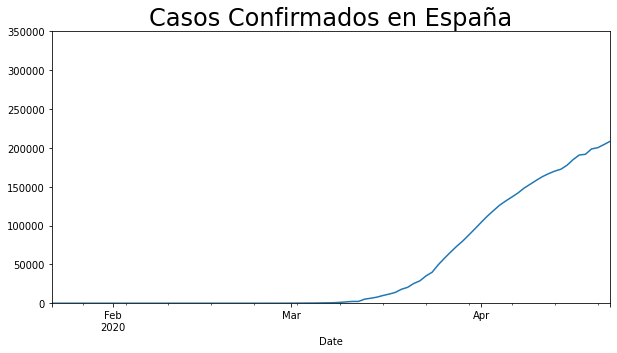

In [21]:
df.ConfirmedCases.plot(figsize=(10,5))
plt.title("Casos Confirmados en España", size = 24)
plt.ylim(0,350000)
plt.show()

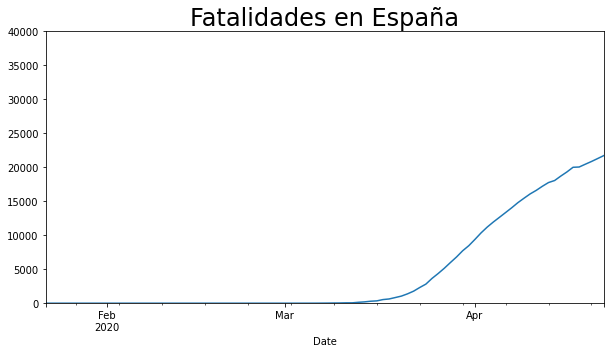

In [22]:
df.Fatalities.plot(figsize=(10,5))
plt.title("Fatalidades en España", size = 24)
plt.ylim(0,40000)
plt.show()

In [23]:
!pip install pmdarima
from pmdarima.arima import auto_arima

     |████████████████████████████████| 1.5MB 2.8MB/s 


In [24]:
model_auto = auto_arima(df.ConfirmedCases, m = 5,
                       max_order = None, max_p = 7, max_q = 7, max_d = 2, max_P = 4, max_Q = 4, max_D = 2,
                       maxiter = 50, alpha = 0.05, information_criterion = 'aic')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [25]:
model_auto

ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 5),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [26]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   92
Model:               SARIMAX(1, 2, 0)   Log Likelihood                -763.200
Date:                Sat, 25 Apr 2020   AIC                           1532.399
Time:                        08:37:13   BIC                           1539.898
Sample:                             0   HQIC                          1535.423
                                 - 92                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     73.4094    128.543      0.571      0.568    -178.531     325.350
ar.L1         -0.5832      0.054    -10.799      0.000      -0.689      -0.477
sigma2      1.372e+06   9.25e+04     14.828      0.000    1.19e+06    1.55e+06
===================================================================================
Ljung-Box (Q):                       38.57   Jarque-Bera (JB):               254.37
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):             639.91   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
#Creando el indice del futuro
date = pd.to_datetime("04-23-2020")
date

Timestamp('2020-04-23 00:00:00')

In [0]:
i_date=date + pd.to_timedelta(np.arange(20), 'D')

In [30]:
i_date

DatetimeIndex(['2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26',
               '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
               '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12'],
              dtype='datetime64[ns]', freq=None)

In [0]:
predictions=model_auto.predict(len(i_date))

In [32]:
df_test = pd.Series(predictions, index=i_date)
df_test.head()

2020-04-23    212531.703650
2020-04-24    216787.643833
2020-04-25    221050.959406
2020-04-26    225383.383436
2020-04-27    229748.916201
dtype: float64

In [0]:
df_auto_pred = pd.DataFrame({'Predictions': predictions},
                            index = i_date)

In [34]:
df_auto_pred.head()

,Predictions
2020-04-23,212531.703650
2020-04-24,216787.643833
2020-04-25,221050.959406
2020-04-26,225383.383436
2020-04-27,229748.916201


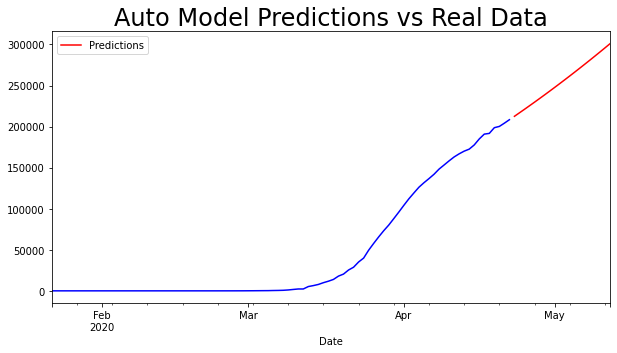

In [35]:
df_auto_pred.plot(figsize = (10,5), color = "red")
df.ConfirmedCases.plot(color = "blue")
plt.title("Auto Model Predictions vs Real Data", size = 24)
plt.show()

## Usando Prophet con los datos de Mexico


In [0]:
df_m = train[train['Country_Region'] == 'Mexico']

In [49]:
len(df_m)

92

In [50]:
df_m.head()

,Country_Region,Date,ConfirmedCases,Fatalities
15916,Mexico,2020-01-22,0.0,0.0
15917,Mexico,2020-01-23,0.0,0.0
15918,Mexico,2020-01-24,0.0,0.0
15919,Mexico,2020-01-25,0.0,0.0
15920,Mexico,2020-01-26,0.0,0.0


In [0]:
confirmed_m=df_m.groupby('Date')['ConfirmedCases'].sum().to_frame().reset_index()

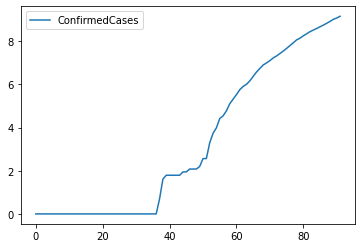

In [52]:
confirmed_m['ConfirmedCases'] = np.log(1+confirmed_m['ConfirmedCases'])
confirmed_m.plot()
plt.show()

In [53]:
confirmed_m.columns = ['ds','y']
confirmed_m['ds'] = pd.to_datetime(confirmed_m['ds'])
confirmed_m.tail()

,ds,y
87,2020-04-18,8.835792
88,2020-04-19,8.922392
89,2020-04-20,9.019422
90,2020-04-21,9.079434
91,2020-04-22,9.159258


In [54]:
model_m = Prophet(interval_width=0.95)
model_m.fit(confirmed_m)
future_m = model_m.make_future_dataframe(periods=30)
future_confirmed_m = future_m.copy() 
future_m

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
117,2020-05-18
118,2020-05-19
119,2020-05-20
120,2020-05-21


In [55]:
forecast_m = model_m.predict(future_m)
forecast_m[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-0.086404,-0.489991,0.380769
1,2020-01-23,-0.086878,-0.494456,0.344612
2,2020-01-24,-0.056851,-0.462785,0.396427
3,2020-01-25,0.030583,-0.420433,0.435189
4,2020-01-26,0.045468,-0.384467,0.494048


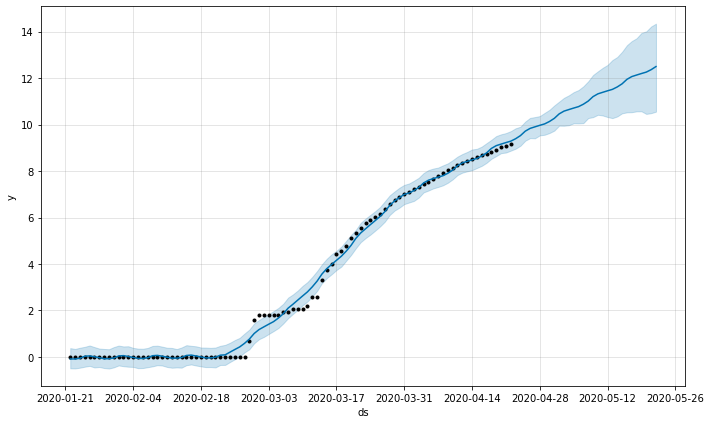

In [56]:
confirmed_forecast_plot = model_m.plot(forecast_m)

# Fatalities

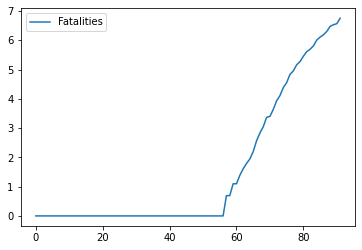

In [57]:
confirmed_m=df_m.groupby('Date')['Fatalities'].sum().to_frame().reset_index()
confirmed_m['Fatalities'] = np.log(1+confirmed_m['Fatalities'])
confirmed_m.plot()
plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


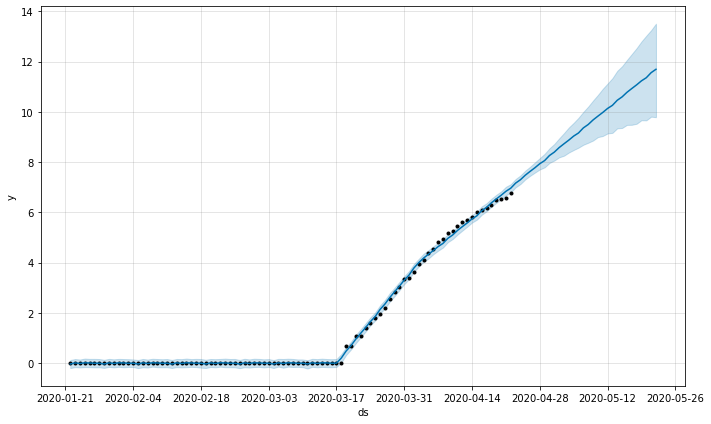

In [58]:
confirmed_m.columns = ['ds','y']
confirmed_m['ds'] = pd.to_datetime(confirmed_m['ds'])
model_m = Prophet(interval_width=0.95)
model_m.fit(confirmed_m)
future_m = model_m.make_future_dataframe(periods=30)
future_confirmed_m = future_m.copy() 
forecast_m = model_m.predict(future_m)
confirmed_forecast_plot = model_m.plot(forecast_m)